In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\PortFolio\Downloads\marketing_AB.csv")

### The idea of the dataset is to analyze the groups, find if the ads were successful and if the difference between the groups is statistically significant.

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Drop unwanted columns

df = df.drop(columns= ['Unnamed: 0'], axis=1)

In [5]:
df.shape

(588101, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [7]:
#Any duplicates

df.duplicated().value_counts()

False    588101
dtype: int64

In [8]:
# Change datatype of user id to object
df['user id'] = df['user id'].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  object
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 23.0+ MB


In [10]:
df['user id'].duplicated().value_counts()

False    588101
Name: user id, dtype: int64

In [11]:
df.describe(include = 'all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.0,588101,588101,588101.000000,588101,588101.000000
unique,588101.0,2,2,NaN,7,NaN
top,1069124.0,ad,False,NaN,Friday,NaN
freq,1.0,564577,573258,NaN,92608,NaN
mean,NaN,NaN,NaN,24.820876,NaN,14.469061
std,NaN,NaN,NaN,43.715181,NaN,4.834634
min,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,4.000000,NaN,11.000000
50%,NaN,NaN,NaN,13.000000,NaN,14.000000
75%,NaN,NaN,NaN,27.000000,NaN,18.000000


In [12]:
# New Column showing 0 or 1 for False or True respectively

df['converted_int'] = df['converted'].astype(int)


In [13]:
# Make days categorical so it can be ordered

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']

df['most ads day'] = pd.Categorical(df['most ads day'], categories= days, ordered= True)

## EDA

<Axes: >

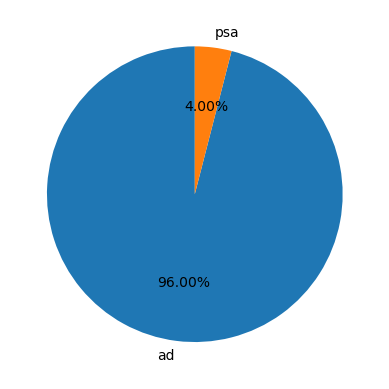

In [14]:
# Ad group and PSA group %  
df.groupby(['test group']).size().plot.pie(autopct='%1.2f%%', startangle=90 )

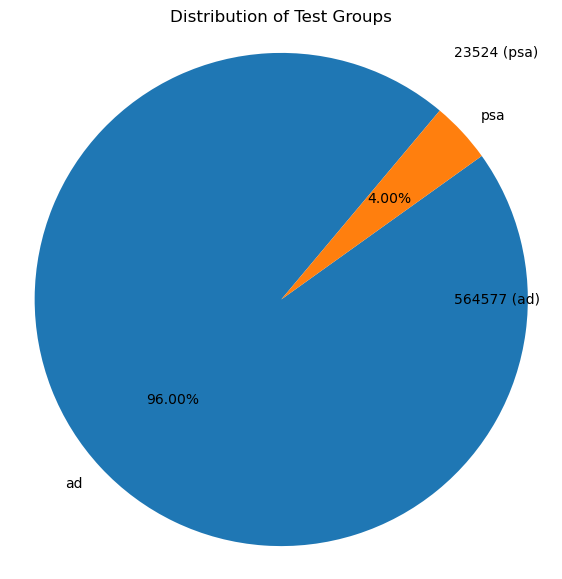

In [15]:
group_sizes = df.groupby(['test group']).size()
plt.figure(figsize=(7, 7))
plt.pie(group_sizes, labels=group_sizes.index, autopct='%1.2f%%', startangle=50)
plt.axis('equal')
plt.title('Distribution of Test Groups')

# Add the number of people in each group as labels
for i, size in enumerate(group_sizes):
    plt.text(x=0.7, y=i, s=f'{size} ({group_sizes.index[i]})', va='center')


In [16]:
# Conversion rates among both groups

group_conversions = df.groupby(['test group', 'converted']).size().reset_index(name='count')
group_conversions

,test group,converted,count
0,ad,False,550154
1,ad,True,14423
2,psa,False,23104
3,psa,True,420


<Axes: ylabel='converted'>

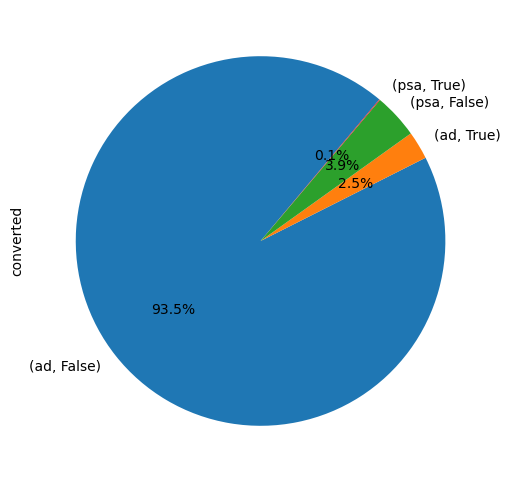

In [17]:
df.groupby(['test group'])['converted'].value_counts().plot.pie(figsize= (6,6), startangle = 50 ,autopct='%1.1f%%')

<Axes: xlabel='test group', ylabel='count'>

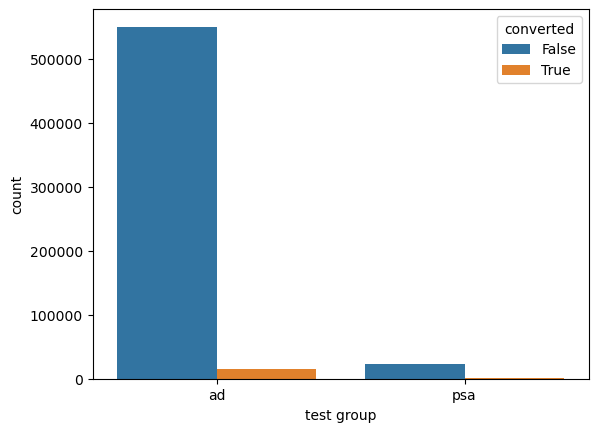

In [18]:
sns.barplot(data = group_conversions, x = group_conversions['test group'], y = 'count',
           hue= 'converted')

<Axes: xlabel='most ads day'>

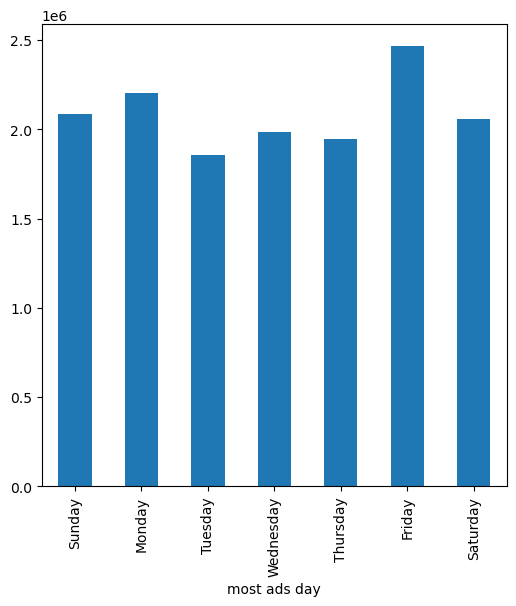

In [19]:
#Total Ads by day of week


df.groupby(['most ads day'])['total ads'].sum().plot(figsize=(6,6), kind = 'bar')

# Observation: Most ads were seen on Fridays - Mondays

<Axes: xlabel='most ads hour'>

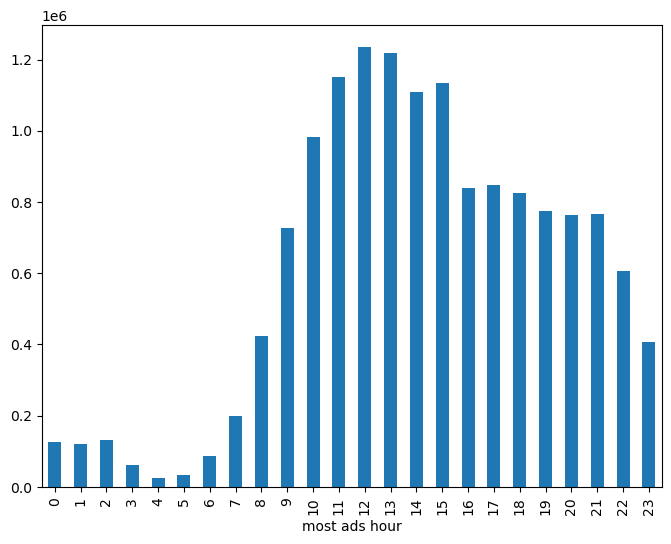

In [20]:
#Total Ads by hour of day


df.groupby(['most ads hour'])['total ads'].sum().plot(figsize=(8,6), kind = 'bar')

# Observation: Most ads were shown from the 9th to 22nd hour

In [21]:
# Conversion rates per day

conversion_day = df.groupby(['most ads day'])['converted_int'].mean().reset_index(name = 'mean')
conversion_day

,most ads day,mean
0,Sunday,0.024476
1,Monday,0.032812
2,Tuesday,0.029840
3,Wednesday,0.024942
4,Thursday,0.021571
5,Friday,0.022212
6,Saturday,0.021051


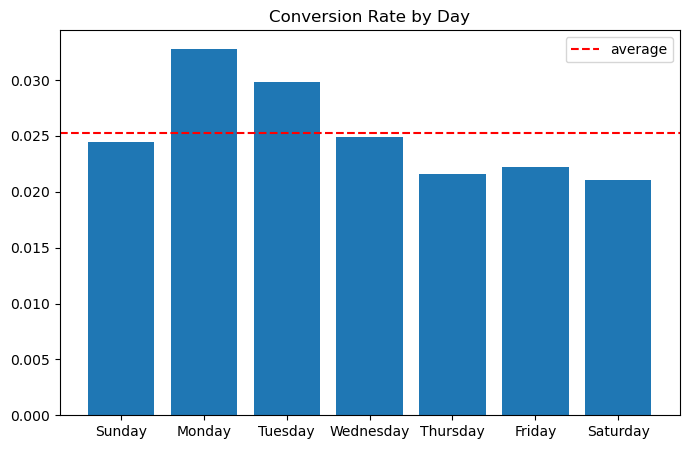

In [22]:
# Show days of the week that have an above average conversion rate

plt.figure(figsize=(8,5))
plt.bar(data=conversion_day, x=conversion_day['most ads day'], height='mean')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted_int'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

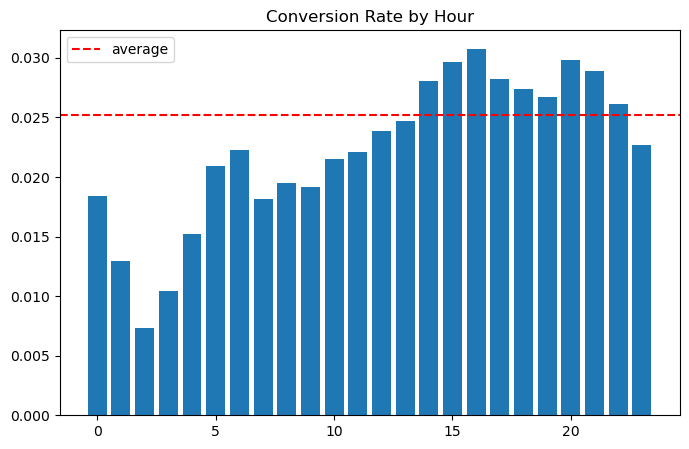

In [23]:
# Show hours that have an above average conversion rate

conversion_hour = df.groupby(['most ads hour'])['converted_int'].mean().reset_index(name = 'mean')

plt.figure(figsize=(8,5))
plt.bar(data=conversion_hour, x=conversion_hour['most ads hour'], height='mean')
plt.title('Conversion Rate by Hour')
plt.axhline(df['converted_int'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

In [24]:
# Total Conversions
df.groupby(['test group'])['converted_int'].sum()

test group
ad     14423
psa      420
Name: converted_int, dtype: int32

In [25]:
# Mean conversion rate by test groups

df.groupby(['test group'])['converted_int'].mean()

test group
ad     0.025547
psa    0.017854
Name: converted_int, dtype: float64

Is this difference in mean conversion rate due to the ads? 

Null Hypothesis: Difference in mean is due to chance

Alternative Hypothesis: Difference in mean is as a result of the ads

Significance level = 5% or 0.05

## Two Sample t-test

In [26]:
# Seperate the groups into different table

test_group = df[(df['test group']=='ad')]

control_group = df[(df['test group']=='psa')]

In [27]:
test_group.head()

,user id,test group,converted,total ads,most ads day,most ads hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


In [28]:
control_group.head()

,user id,test group,converted,total ads,most ads day,most ads hour,converted_int
18,900681,psa,False,248,Saturday,19,0
38,905704,psa,False,27,Thursday,8,0
68,904595,psa,False,13,Tuesday,19,0
140,901904,psa,False,32,Wednesday,19,0
157,902234,psa,False,105,Tuesday,19,0


In [29]:
# Getting the mean difference

mean_difference = test_group.converted_int.mean() - control_group.converted_int.mean()
mean_difference

0.007692453192201517

In [30]:
#p value

stat, pvalue = stats.ttest_ind(a = control_group.converted_int, b = test_group.converted_int, equal_var = False)

In [31]:
sig_level = 0.05

In [32]:
if pvalue < sig_level:
    print('Null hypothesis REJECTED. Difference in mean is statistically significant')
else: print('FAILED TO REJECT null hypothesis. Difference in mean is due to chance')

Null hypothesis REJECTED. Difference in mean is statistically significant


### Conclusion: The ads have a positive effect on Conversion Rate

However, this might be because the number of people that received the Ads greatly outnumber the PSA group.
So lets repeat this test but with an equal number of participants. 
5000 users selected from each group

In [33]:
test_sample = test_group.sample(n = 5000, random_state= 2, replace= False)
test_sample

,user id,test group,converted,total ads,most ads day,most ads hour,converted_int
117055,1351203,ad,False,222,Sunday,0,0
277676,1257164,ad,False,11,Thursday,9,0
521199,1141715,ad,False,1,Thursday,17,0
151925,1087277,ad,False,118,Saturday,15,0
360213,1270952,ad,False,5,Friday,8,0
...,...,...,...,...,...,...,...
66807,1391456,ad,False,30,Friday,18,0
352046,1029657,ad,False,13,Wednesday,23,0
407764,1474057,ad,False,7,Wednesday,12,0
466827,1647878,ad,False,12,Thursday,22,0


In [34]:
control_sample = control_group.sample(n = 5000, random_state= 1, replace= False)
control_sample

,user id,test group,converted,total ads,most ads day,most ads hour,converted_int
67034,901932,psa,False,139,Saturday,15,0
35349,915417,psa,False,6,Friday,0,0
62023,917589,psa,False,39,Saturday,13,0
546552,900967,psa,False,11,Monday,17,0
73802,912104,psa,False,42,Saturday,18,0
...,...,...,...,...,...,...,...
574744,903820,psa,False,3,Saturday,19,0
574064,901774,psa,False,4,Tuesday,8,0
132725,906037,psa,True,425,Friday,10,1
581976,905160,psa,False,20,Monday,16,0


In [35]:
sample_test_mean = test_sample.converted_int.mean()
sample_test_mean

0.0276

In [36]:
sample_control_mean = control_sample.converted_int.mean()
sample_control_mean

0.016

In [37]:
sample_mean_difference = sample_test_mean - sample_control_mean
sample_mean_difference

0.0116

In [38]:
#p value

stat, pvalue = stats.ttest_ind(a = control_sample.converted_int, b = test_sample.converted_int, equal_var = False)
pvalue

7.104920987280057e-05

In [39]:
if pvalue < sig_level:
    print('Null hypothesis REJECTED. Difference in mean is statistically significant')
else: print('FAILED TO REJECT null hypothesis. Difference in mean is due to chance')

Null hypothesis REJECTED. Difference in mean is statistically significant


## Is there a relationship between the test groups and conversions

### Chi-squared test of Independence 

Null Hypothesis: There is no relationship between advertisements and conversion

Alternative Hypothesis : There is A relationship between adverts and conversion

In [40]:
pd.crosstab(df['test group'], df['converted'], margins = True)

converted,False,True,All
test group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [41]:
from scipy.stats import chi2_contingency

# Cross-tab
cross_tab = pd.crosstab(df['test group'], df['converted'], margins=True)

# Perform the chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Display the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 54.318051591383124
p-value: 4.5144265218984724e-11
Degrees of freedom: 4
Expected frequencies table:
[[550327.71899045  14249.28100955 564577.        ]
 [ 22930.28100955    593.71899045  23524.        ]
 [573258.          14843.         588101.        ]]


In [42]:
if p < 0.05:
    print('Reject Null Hypothesis. There is A relationship between adverts and conversion')
else: print("Fail to reject Null Hypothesis. There is no relationship between advertisements and conversion")

Reject Null Hypothesis. There is A relationship between adverts and conversion


## In Conclusion. The campaign was successful and credit can be given to the ads